# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы ответы не отличались от воспроизведения к воспроизведению")

Чтобы ответы не отличались от воспроизведения к воспроизведению


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
# your code here
display(df_test.head())
display(df_test.tail())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
# your code here
display(df_train.describe())
display(df_train.describe(include="object"))
display(df_test.describe())
display(df_test.describe(include="object"))

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [7]:
# your code here
"""Есть, в колонках seats, mileage, engine, max_power, torque"""

'Есть, в колонках seats, mileage, engine, max_power, torque'

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [8]:
# your code here
df_train[df_train.drop("selling_price", axis=1).duplicated()].shape

(1159, 13)

In [9]:
"""Количество дубликатов = 1159"""

'Количество дубликатов = 1159'

In [18]:
print("Общее количество дублирующихся строк:", df_train.drop("selling_price", axis=1).duplicated(keep=False).sum())

Общее количество дублирующихся строк: 1799


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [19]:
# your code here
df_train[df_train.drop("selling_price", axis=1).duplicated(keep=False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [20]:
# your code here
subset = [
    'name', 'year', 'km_driven', 'fuel', 'seller_type','transmission', 
    'owner', 'mileage', 'engine', 'max_power', 'torque','seats'
    ]
df_train = df_train.drop_duplicates(keep='first', subset=subset)

In [21]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [22]:
# your code here
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [23]:
# your code here
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x[:-5]) if isinstance(x, str) else np.NaN)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x[:-5]) if isinstance(x, str) else np.NaN)
df_train['engine'] = df_train['engine'].apply(lambda x: float(x[:-3]) if isinstance(x, str) else np.NaN)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x[:-3]) if isinstance(x, str) else np.NaN)
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x[:-4]) if isinstance(x, str) and len(x) > 4 else np.NaN)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x[:-4]) if isinstance(x, str) and len(x) > 4 else np.NaN)
df_train.drop("torque", axis=1, inplace=True)
df_test.drop("torque", axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [24]:
# your code here
df_train['seats'].fillna(df_train['seats'].median(), inplace=True)
df_train['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_train['engine'].fillna(df_train['engine'].median(), inplace=True)
df_train['max_power'].fillna(df_train['max_power'].median(), inplace=True)
df_test['seats'].fillna(df_train['seats'].median(), inplace=True)
df_test['mileage'].fillna(df_train['mileage'].median(), inplace=True)
df_test['engine'].fillna(df_train['engine'].median(), inplace=True)
df_test['max_power'].fillna(df_train['max_power'].median(), inplace=True)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [122]:
print("Потому что для большинства автомобилей фича seats имеет одинаковое число", "\n", 
    df_train['seats'].value_counts(1), "\n", 
    "поэтому для того, чтобы регрессия нормально присвоила вес для этой фичи и она была более информативной, имеет смысл перевести ее к категориальной")

Потому что для большинства автомобилей фича seats имеет одинаковое число 
 5.0     0.790753
7.0     0.136986
8.0     0.032705
4.0     0.016096
9.0     0.011644
6.0     0.008219
10.0    0.003082
2.0     0.000342
14.0    0.000171
Name: seats, dtype: float64 
 поэтому для того, чтобы регрессия нормально присвоила вес для этой фичи и она была более информативной, имеет смысл перевести ее к категориальной


In [25]:
# your code here
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

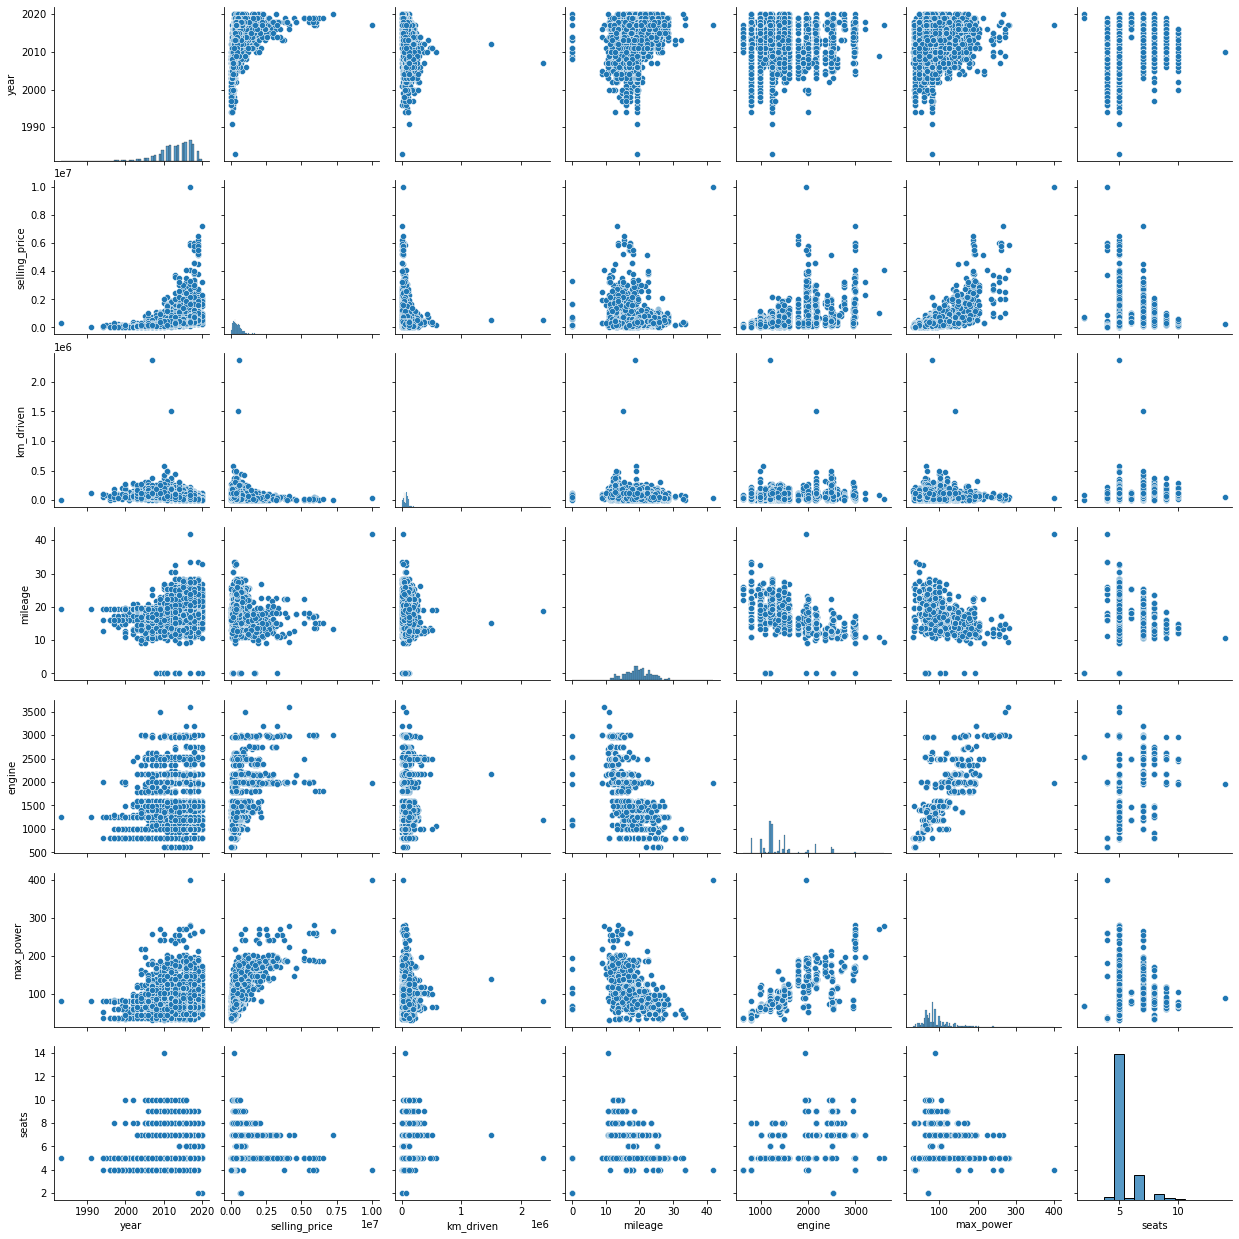

In [129]:
# your code here
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

`Ответ 1:`

1. Чем новее машина, тем дороже она строит.
2. Чем меньше у машины проеханных км, тем дороже она стоит.
3. Пробег машины также влияет на целевую переменную, схоже с количеством проеханных км. 
4. Чем выше литраж двигателя - тем дороже машина.
5. Чем больше лошадиных сил в машине - там она дороже.
6. Чем меньше сидений в тачке, тем она дороже (логично, учитывая, что у спорткаров обычно 2 сидения).

`Ответ 2:`

1. Явную положительную корреляцию имеют тип двигателя и количество лошадиных сил - чем больше литров, тем она мощнее. 
2. Также можно сказать о некоторой положительной корреляции у количества лошаднных сил и двигателя от года - у новые машины мощнее. \
В остальном сложно сказать что то о корреляции признаков.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

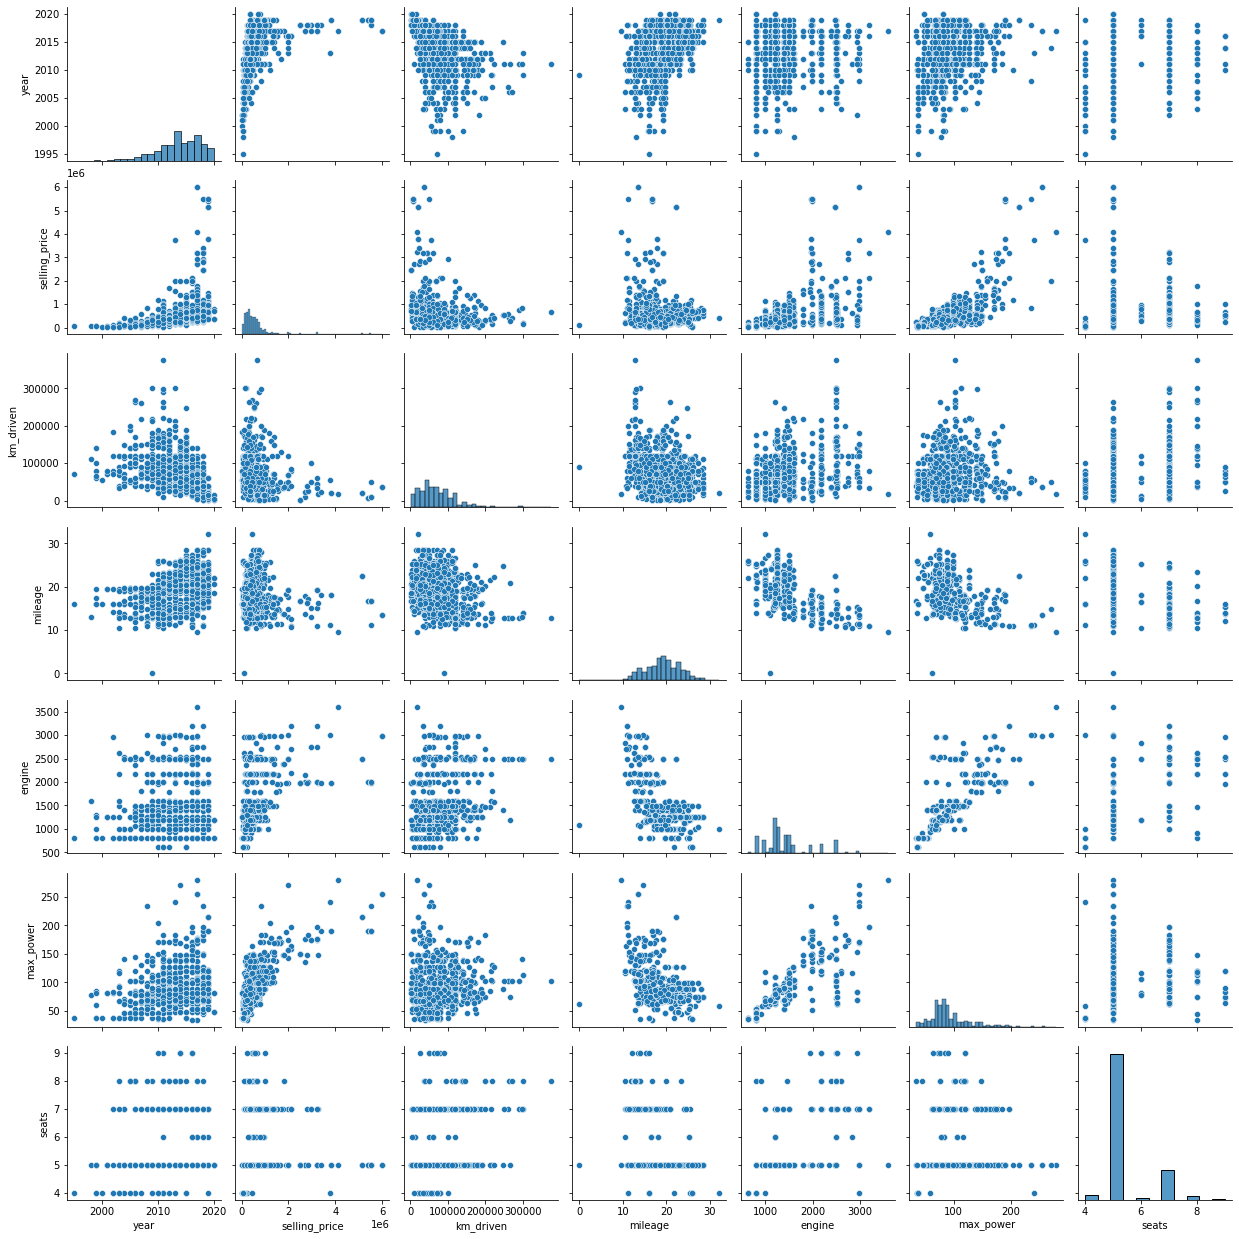

In [135]:
# your code here
sns.pairplot(df_test)

В целом да, оказались похожими. Но заметно, что в тестовой выборке гораздо меньше выбросов, из за чего пэйрплот на тесте получился более информативным и репрезентативным.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

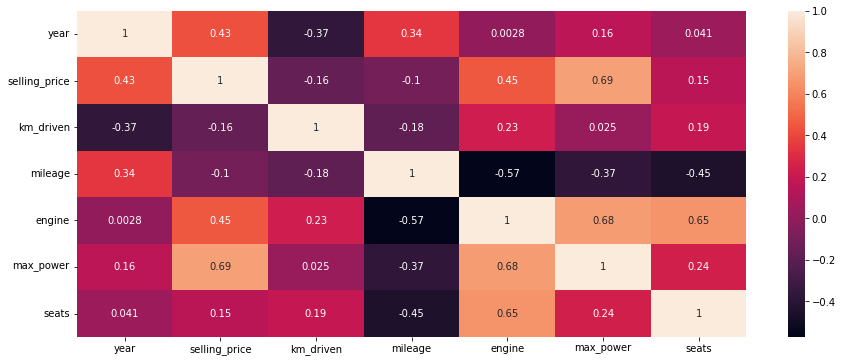

In [141]:
# your code here
plt.figure(figsize=(15, 6))
sns.heatmap(df_train.corr(), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

`Ответ 1:` \
Признаки year и engine. \
`Ответ 2:` \
Между engine и max_power. Если учитывать еще и целевую переменную, как признак, то между selling_price и max_power. \
`Ответ 3:` \
Скорее да, так как между двумя этими признаками наблюдается отрицательная корреляция (те чем больше год - тем меньше пробег). Хотя. судя по графику скеттер плота между двумя этими переменными, то машины с большим пробегом имеют год выпуска в районе 2010-х.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

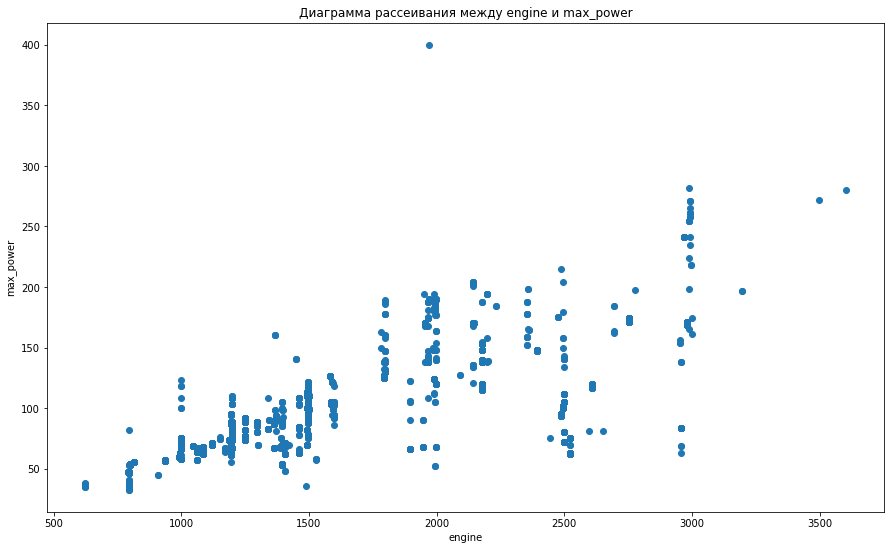

In [146]:
# your code here
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.scatter(x = df_train["engine"], y = df_train['max_power'])
ax.set_xlabel("engine")
ax.set_ylabel("max_power")
ax.set_title("Диаграмма рассеивания между engine и max_power")
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

`selling_price` и `max_power` сильно скоррелированы, скорее всего у этой фичи будет больший вес у модели.

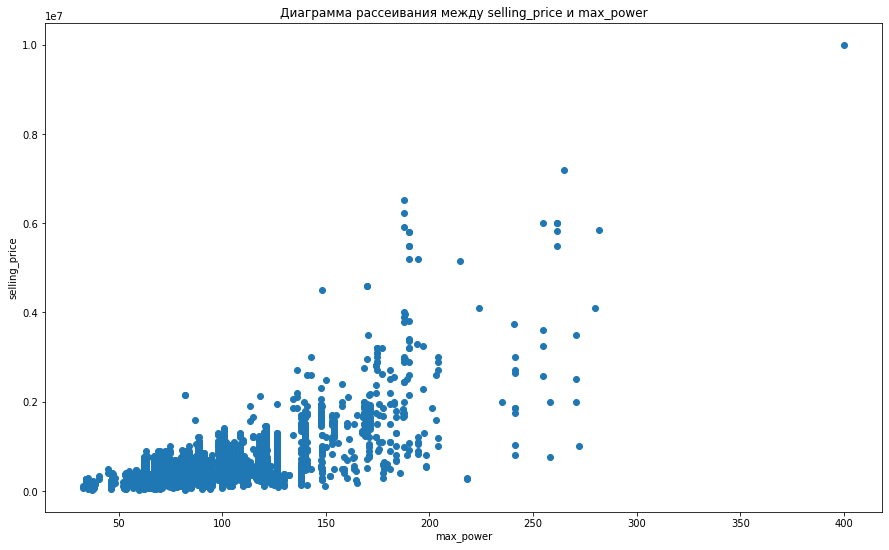

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.scatter(y = df_train["selling_price"], x = df_train['max_power'])
ax.set_xlabel("max_power")
ax.set_ylabel("selling_price")
ax.set_title("Диаграмма рассеивания между selling_price и max_power")
plt.show()

Между `mileage` и `engine` тоже есть заметная корреляция - больше всего пробег у малолитражных машин.

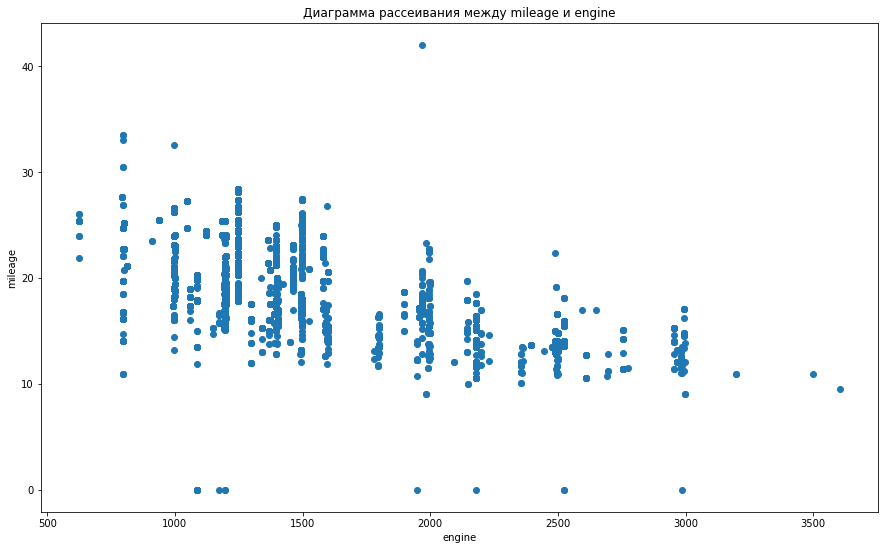

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
ax.scatter(y = df_train["mileage"], x = df_train['engine'])
ax.set_xlabel("engine")
ax.set_ylabel("mileage")
ax.set_title("Диаграмма рассеивания между mileage и engine")
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [26]:
y_train = df_train["selling_price"]
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [27]:
assert X_train.shape == (5840, 6)

In [28]:
y_test = df_test["selling_price"]
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [29]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
LR = LinearRegression().fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

print(f"Значение R^2 на трейне: {r2_score(y_train, y_pred_train)}, значение R^2 на тесте: {r2_score(y_test, y_pred_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_pred_train)}, значение MSE на трейне: {MSE(y_test, y_pred_test)}")

Значение R^2 на трейне: 0.5932097784368082, значение R^2 на тесте: 0.5946576472666427
Значение MSE на трейне: 116601673169.1098, значение MSE на трейне: 233002359160.80463


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [31]:
from sklearn.preprocessing import StandardScaler

# your code here
SC = StandardScaler().fit(X_train)

X_train = pd.DataFrame(SC.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(SC.transform(X_test), index=X_test.index, columns=X_test.columns)

In [32]:
LR = LinearRegression().fit(X_train, y_train)
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

print(f"Значение R^2 на трейне: {r2_score(y_train, y_pred_train)}, значение R^2 на тесте: {r2_score(y_test, y_pred_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_pred_train)}, значение MSE на трейне: {MSE(y_test, y_pred_test)}")

Значение R^2 на трейне: 0.5932097784368071, значение R^2 на тесте: 0.5946576472666558
Значение MSE на трейне: 116601673169.1101, значение MSE на трейне: 233002359160.79706


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [33]:
# your code here
print(np.argmax(LR.coef_))
print(max(LR.coef_))

4
324496.85782121716


In [34]:
X_train.columns[0]

'year'

In [36]:
print("Самым информативным оказался year для предсказания цены")

Самым информативным оказался year для предсказания цены


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [37]:
from sklearn.linear_model import Lasso

# your code here

lasso = Lasso().fit(X_train, y_train)
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

print(f"Значение R^2 на трейне: {r2_score(y_train, y_pred_lasso_train)}, значение R^2 на тесте: {r2_score(y_test, y_pred_lasso_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_pred_lasso_train)}, значение MSE на трейне: {MSE(y_test, y_pred_lasso_test)}")

Значение R^2 на трейне: 0.5932097784014825, значение R^2 на тесте: 0.5946564811772825
Значение MSE на трейне: 116601673179.23553, значение MSE на трейне: 233003029462.2673


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [38]:
# your code here
lasso.coef_

array([152247.14742736, -44065.05085353,  29317.30055383,  59320.137094  ,
       324497.75189092, -22156.30524519])

In [39]:
lasso.alpha

1.0

In [40]:
"""Нет, не занулила, так как лассо с дефолтными параметрами имеет alpha = 1, что подходит не для всех регрессий и данных, так как с таким параметром Lasso недостаточно штрафует. 
По хорошему, данный гиперпараметр надо тюнить на грид серче."""

'Нет, не занулила, так как лассо с дефолтными параметрами имеет alpha = 1, что подходит не для всех регрессий и данных, так как с таким параметром Lasso недостаточно штрафует. \nПо хорошему, данный гиперпараметр надо тюнить на грид серче.'

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
search = GridSearchCV(Lasso(),
                      {'alpha':np.arange(0.1,100,0.1)},
                      cv = cv
                      )

In [42]:
search.fit(X_train, y_train)
search.best_params_

{'alpha': 99.9}

In [43]:
lasso = Lasso(alpha=99.9).fit(X_train, y_train)
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

lasso.coef_

array([152222.97239652, -43956.20711374,  29139.91603988,  58849.95770103,
       324584.86919913, -21871.97444987])

In [44]:
print(f"Значение R^2 на трейне: {r2_score(y_train, y_pred_lasso_train)}, значение R^2 на тесте: {r2_score(y_test, y_pred_lasso_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_pred_lasso_train)}, значение MSE на трейне: {MSE(y_test, y_pred_lasso_test)}")

Значение R^2 на трейне: 0.5932094354205715, значение R^2 на тесте: 0.594541220226783
Значение MSE на трейне: 116601771490.71396, значение MSE на трейне: 233069284747.9644


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [47]:
# your code here
print(f"По гридсерчу обучилось {len(np.arange(0.1,100,0.1)) * 10 + 1} моделей (те количество перебираемых параметров умножить на 10 фолдов + 1 тк стоит флаг рефита == True)")
print(f"У лучшей регуляризации коэффициент 99.9, но если дальше по GridSearch искать параметры, то модель может уйти до 9999")
print(f"Не занулились. Вероятно штраф не такой большой для ошибки весов")

По гридсерчу обучилось 9991 моделей (те количество перебираемых параметров умножить на 10 фолдов + 1 тк стоит флаг рефита == True)
У лучшей регуляризации коэффициент 99.9, но если дальше по GridSearch искать параметры, то модель может уйти до 9999
Не занулились. Вероятно штраф не такой большой для ошибки весов


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [48]:
from sklearn.linear_model import ElasticNet

cv = KFold(n_splits=10, shuffle=True, random_state=42)
search_en = GridSearchCV(ElasticNet(),
                      {'alpha':np.arange(0.1,3,0.1), "l1_ratio":np.arange(0.1,1,0.1)},
                      cv = cv
                      )

In [49]:
search_en.fit(X_train, y_train)
search_en.best_params_

{'alpha': 0.4, 'l1_ratio': 0.9}

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [50]:
# your code here
print(f"У лучшей из моделей гиперме {search_en.best_params_}")

У лучшей из моделей гиперме {'alpha': 0.4, 'l1_ratio': 0.9}


In [51]:
e_net = ElasticNet(alpha=0.4, l1_ratio=0.9).fit(X_train, y_train)
y_pred_net_train = e_net.predict(X_train)
y_pred_net_test = e_net.predict(X_test)

print(f"Значение R^2 на трейне: {r2_score(y_train, y_pred_net_train)}, значение R^2 на тесте: {r2_score(y_test, y_pred_net_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_pred_net_train)}, значение MSE на трейне: {MSE(y_test, y_pred_net_test)}")

Значение R^2 на трейне: 0.5924372494446197, значение R^2 на тесте: 0.5858731205858506
Значение MSE на трейне: 116823109595.76399, значение MSE на трейне: 238051955944.6917


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [52]:
X_train_cat = df_train.drop(["name", "selling_price"], axis=1)
y_train_cat = df_train["selling_price"]
X_test_cat = df_test.drop(["name", "selling_price"], axis=1)
y_test_cat = df_test["selling_price"]

In [53]:
SC = StandardScaler()
features_num = X_train_cat.columns[(X_train_cat.dtypes!="object").values]

X_train_cat[features_num] = SC.fit_transform(X_train_cat[features_num])
X_test_cat[features_num] = SC.transform(X_test_cat[features_num])

In [54]:
assert X_train_cat.shape == (5840, 10)

In [55]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [56]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

OHE = OneHotEncoder(drop="first")

cat_features = X_train_cat.columns[X_train_cat.dtypes=="object"].union(["seats"]).tolist()

X_train_ohe = OHE.fit_transform(X_train_cat[cat_features]).toarray()
X_test_ohe = OHE.transform(X_test_cat[cat_features]).toarray()

X_train_cat.drop(columns=cat_features, axis=1, inplace=True)
X_test_cat.drop(columns=cat_features, axis=1, inplace=True)

new_cat_features = OHE.get_feature_names(input_features=cat_features)

X_train_cat[new_cat_features] = X_train_ohe
X_test_cat[new_cat_features] = X_test_ohe

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {"alpha": np.arange(0, 10, 0.1)}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
gs = GridSearchCV(Ridge(), params, cv=cv, scoring='r2')

gs.fit(X_train_cat, y_train_cat)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='r2')

In [58]:
gs.best_params_

{'alpha': 0.0}

In [59]:
ridge = Ridge(alpha=0.0).fit(X_train_cat, y_train_cat)
y_pred_ridge_train = ridge.predict(X_train_cat)
y_pred_ridge_test = ridge.predict(X_test_cat)

print(f"Значение R^2 на трейне: {r2_score(y_train, y_pred_ridge_train)}, значение R^2 на тесте: {r2_score(y_test, y_pred_ridge_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_pred_ridge_train)}, значение MSE на трейне: {MSE(y_test, y_pred_ridge_test)}")

Значение R^2 на трейне: 0.6679485192820618, значение R^2 на тесте: 0.626211589112194
Значение MSE на трейне: 95178684682.26564, значение MSE на трейне: 214864252345.02692


In [60]:
print("Качетсво удалось улучшить, r2 вырос, MSE стало меньше.")

Качетсво удалось улучшить, r2 вырос, MSE стало меньше.


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

### Можно сначала сразу пролагорифмировать таргет и использовать уже имеющийся датасет

In [61]:
from sklearn.compose import TransformedTargetRegressor

params = {"regressor__alpha": np.arange(0, 10, 0.1)}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
gs = GridSearchCV(TransformedTargetRegressor(Ridge(), func=np.log1p, inverse_func=np.expm1), params, cv=cv, scoring="r2")

gs.fit(X_train_cat, y_train_cat)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'expm1'>,
                                                  regressor=Ridge()),
             param_grid={'regressor__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='r2')

In [62]:
#  ридж регуляризатор получается что зануляется
gs.best_params_

{'regressor__alpha': 0.0}

In [63]:
y_preds_ridge_train = gs.best_estimator_.predict(X_train_cat)
y_preds_ridge_test = gs.best_estimator_.predict(X_test_cat)

print(f"Значение R^2 на трейне: {r2_score(y_train, y_preds_ridge_train)}, значение R^2 на тесте: {r2_score(y_test, y_preds_ridge_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_preds_ridge_train)}, значение MSE на трейне: {MSE(y_test, y_preds_ridge_test)}")

Значение R^2 на трейне: 0.8254369113516109, значение R^2 на тесте: 0.8182983325677022
Значение MSE на трейне: 50036473668.7947, значение MSE на трейне: 104447307047.20465


##### Логарифмирование таргета уже дало хороший буст в r2, попробуем еще добавить полезных фичей.

In [64]:
# начнем с нуля
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

In [65]:
subset = [
    'name', 'year', 'km_driven', 'fuel', 'seller_type','transmission', 
    'owner', 'mileage', 'engine', 'max_power', 'torque','seats'
    ]
df_train = df_train.drop_duplicates(keep='first', subset=subset)
df_train.reset_index(drop=True, inplace=True)

In [66]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(x[:-5]) if isinstance(x, str) else np.NaN)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(x[:-5]) if isinstance(x, str) else np.NaN)
df_train['engine'] = df_train['engine'].apply(lambda x: float(x[:-3]) if isinstance(x, str) else np.NaN)
df_test['engine'] = df_test['engine'].apply(lambda x: float(x[:-3]) if isinstance(x, str) else np.NaN)
df_train['max_power'] = df_train['max_power'].apply(lambda x: float(x[:-4]) if isinstance(x, str) and len(x) > 4 else np.NaN)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(x[:-4]) if isinstance(x, str) and len(x) > 4 else np.NaN)
df_train.drop("torque", axis=1, inplace=True)
df_test.drop("torque", axis=1, inplace=True)

In [67]:
for col in df_train.drop("selling_price", axis=1).columns:
    df_train[f"{col}_isna"] = df_train[col].isna().astype("category")
    df_test[f"{col}_isna"] = df_test[col].isna().astype("category")

    if df_train[col].dtype != "object":
        df_train[col] = df_train[col].fillna(df_train[col].median())
        df_test[col] = df_test[col].fillna(df_train[col].median())
    else:
        df_train[col] = df_train[col].fillna("_")
        df_test[col] = df_test[col].fillna("_")

In [68]:
y_train = df_train["selling_price"]
X_train = df_train.drop("selling_price", axis=1)
y_test = df_test["selling_price"]
X_test = df_test.drop("selling_price", axis=1)

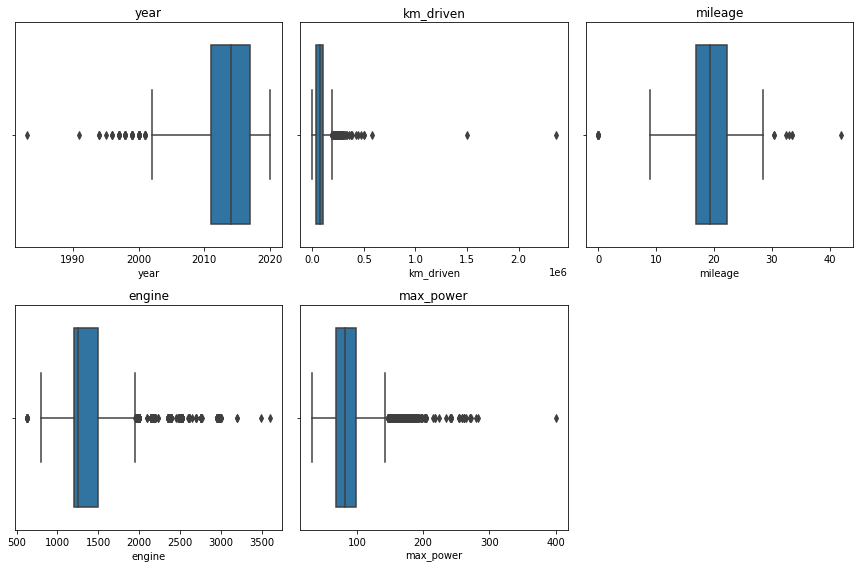

In [77]:
df_num = X_train[["year", "km_driven", "mileage", "engine", "max_power"]].copy()
plt.figure(figsize=(12, 8))
for feature in df_num.columns:
    plt.subplot(2, 3, df_num.columns.to_list().index(feature) + 1)
    sns.boxplot(data=df_num, x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

Есть небольшие выбросы, но я думаю они не сильно портят качество, если их дропать (проверил эмпирически).

In [78]:
def new_features(data_train):
    
    # сделаем отношение max_power к engine
    data_train['max_p_on_engine'] = data_train['max_power']/data_train['engine']
    # нормализуем кол-во пробега на года 
    car_ratio = data_train['year'].max() - (data_train['year'] + 1)
    data_train['km_driven_on_years'] = (data_train['km_driven']/car_ratio).replace(np.inf, 0)
    # добавим фичу состояния автомобиля 
    data_train['in_good_cond'] = (data_train['owner'].isin(["First Owner", "Second Owner"])).astype(int).astype("category")
    # добавим полиномы фичей
    features_num = set(data_train.columns[(data_train.dtypes=="number").values]).difference(set(["seats"]))
    for feature in features_num:
        data_train[f"{feature}_sq"] = data_train[feature]**2
    # добавим дамми переменные по брендам машин
    car_brand = data_train['name'].apply(lambda x: x.split(" ")[0])
    data_train["car_brand"] = car_brand
    data_train.drop("name", axis=1, inplace=True)

    return data_train

In [79]:
X_train = new_features(X_train)
X_test = new_features(X_test)

In [80]:
from sklearn.preprocessing import StandardScaler
def scale_features(data_train, data_test):
    SC = StandardScaler()
    features_num = list(set(data_train.select_dtypes("number").columns).difference(set(["seats"])))
    data_train[features_num] = SC.fit_transform(data_train[features_num])
    data_test[features_num] = SC.transform(data_test[features_num])

    cat_features = data_train.columns[data_train.dtypes=="object"].union(["seats"]).tolist()

    data_train["split_type"] = "train"
    data_test["split_type"] = "test"
    data = pd.concat([data_train, data_test])
    data = pd.get_dummies(data, drop_first=True, columns=cat_features)
    data_train = data[data["split_type"] == "train"]
    data_test = data[data["split_type"] == "test"]
    data_train.drop(columns="split_type", axis=1, inplace=True)
    data_test.drop(columns="split_type", axis=1, inplace=True)
    
    return data_train, data_test

In [81]:
X_train, X_test = scale_features(X_train, X_test)

/var/folders/rk/0j6949bd5px40r17vcqmqwj80000gp/T/ipykernel_3734/457577448.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(columns="split_type", axis=1, inplace=True)
/var/folders/rk/0j6949bd5px40r17vcqmqwj80000gp/T/ipykernel_3734/457577448.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop(columns="split_type", axis=1, inplace=True)


In [83]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

params = {"regressor__alpha": np.arange(0, 10, 0.1)}
cv = KFold(n_splits=10, shuffle=True, random_state=42)
gs = GridSearchCV(TransformedTargetRegressor(Ridge(), func=np.log1p, inverse_func=np.expm1), params, cv=cv, scoring="r2")

gs.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:205: RuntimeWarning: overflow encountered in expm1
  return func(X, **(kw_args if kw_args else {}))
/Library/Fr

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                                  inverse_func=<ufunc 'expm1'>,
                                                  regressor=Ridge()),
             param_grid={'regressor__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='r2')

In [84]:
gs.best_params_

{'regressor__alpha': 0.1}

In [85]:
y_preds_ridge_train = gs.best_estimator_.predict(X_train)
y_preds_ridge_test = gs.best_estimator_.predict(X_test)

print(f"Значение R^2 на трейне: {r2_score(y_train, y_preds_ridge_train)}, значение R^2 на тесте: {r2_score(y_test, y_preds_ridge_test)}")
print(f"Значение MSE на трейне: {MSE(y_train, y_preds_ridge_train)}, значение MSE на трейне: {MSE(y_test, y_preds_ridge_test)}")

Значение R^2 на трейне: 0.9106327541052066, значение R^2 на тесте: 0.9168541253261471
Значение MSE на трейне: 25616078866.904247, значение MSE на трейне: 47794623046.06597


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [86]:
import pickle
pickle.dump(gs.best_estimator_, open('model.pkl', 'wb'))

In [87]:
import joblib
model = joblib.load("model.pkl")

#### Вроде как получился хороший результат

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [88]:
def business_metrics(y_true, y_pred):
    bias = abs(y_true - y_pred)
    bias_share = bias/y_true
    
    return len(bias_share[bias_share<=0.10])/len(bias_share)

business_metrics(y_test, y_preds_ridge_test)

0.375

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link